# US Arrests

## Business Understanding

Violent crime in the United States refers to murder, rape and sexual assault, robbery, and assault. It is important to note that violent crime rates may not always be precise as crimes that remain unreported can often skew rates meaning it can generally be assumed that instances of crime are more prevalent than reported crime statistics suggest.

### Business Objective

USArrests data is the arrest data from 1973. This is a public dataset available in R. For more details on the dataset see https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html. This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. It also contains the percentage of people in the state who live in an urban area. The aim is to see if there is any dependency between the state and the arrest history.  Clustering allows us to identify which observations are alike, and potentially categorize them therein.

## Goals of Data Analysis

In this project, we will analyse arrest data using unsupervised learning. Unsupervised learning is a statistical technique for exploring and discovering knowledge, from a multivariate data, without building a predictive models. It helps to visualize the relationship between variables, as well as, to identify groups of similar observations.

## Data Understanding

In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [3]:
# Import the dataset

usarrests_data = pd.read_csv('USArrests.csv')

#### Inspect the Dataframe

In [4]:
# Head of the dataset

usarrests_data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
# Dimensions of the dataframe

usarrests_data.shape

(50, 5)

In [6]:
# Statistical aspects of the dataframe

usarrests_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
# Type of each column

usarrests_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
Unnamed: 0    50 non-null object
Murder        50 non-null float64
Assault       50 non-null int64
UrbanPop      50 non-null int64
Rape          50 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


#### Insights of Dataset
-  The dataset contains 50 entries with 5 features. 
-  It contains 4 numerical input variables and 1 string variable. 
-  There are no null values. In the data cleaning step, we can rename the column 'Unnamed: 0' as 'State' and set it as index

## Data Preparation

### Data Cleaning

In [8]:
# Rename the column 'Unnamed: 0' as 'State'

usarrests_data.rename(columns={"Unnamed: 0": "State"}, inplace = True)

# Head of the dataset

usarrests_data.head(10)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## Exploratory Data Analysis

#### Univariate Analysis

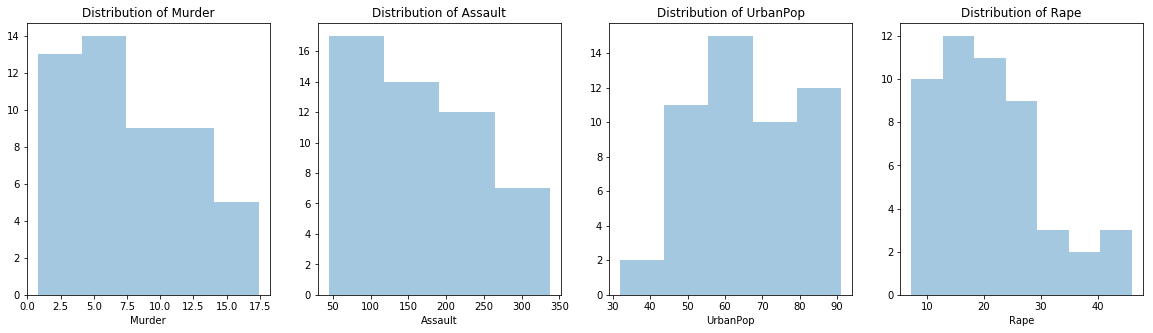

In [9]:
## Plot percentage of Frauds

fig,axes = plt.subplots(1, 4, figsize = (20,5))
i = 0
for col in ['Murder', 'Assault', 'UrbanPop', 'Rape']:
    sns.distplot(usarrests_data[col], ax = axes[i], kde = False)
    axes[i].set_title('Distribution of {}'.format(col))
    i += 1

#### Insights:
- The number of Assault is high compared to Murder and Rape.
- Urban Population count is high for 55% to 65% of the population.

#### Bivariate Analysis

#### State vs UrbanPop

Text(0.5, 1.0, 'Distribution of Urban Population based on State')

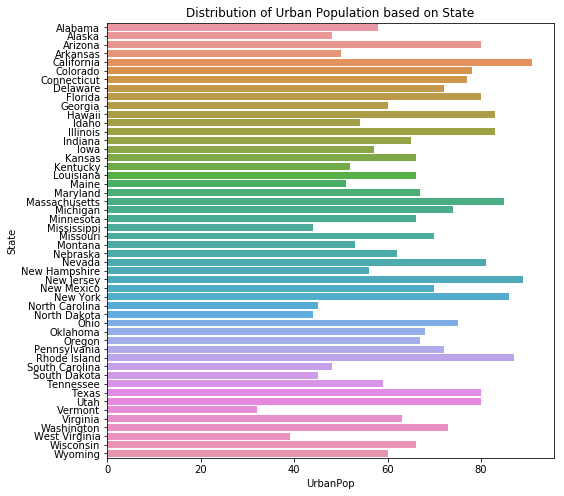

In [10]:
# Distribution of Urban Population based on State

plt.figure(figsize = (8, 8))
sns.barplot( usarrests_data['UrbanPop'], usarrests_data['State'])
plt.title('Distribution of Urban Population based on State')

#### Insights:
- Highest Population is in California. Followed by New Jersey and Rhode Island.
- Least Population is in Vermont

#### State vs Murder

Text(0.5, 1.0, 'Distribution of Murder rate based on State')

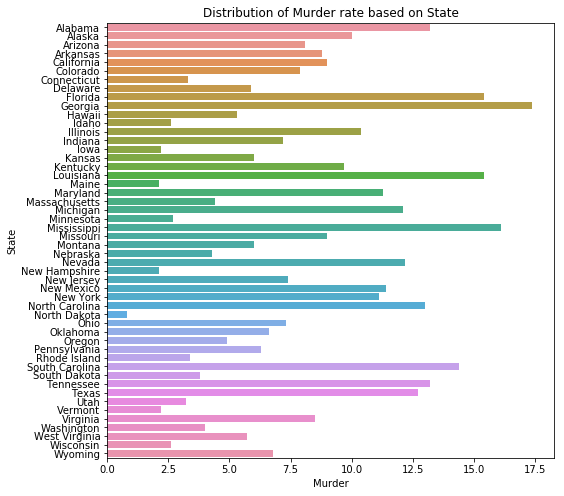

In [11]:
# Distribution of Murder rate based on State

plt.figure(figsize = (8, 8))
sns.barplot( usarrests_data['Murder'], usarrests_data['State'])
plt.title('Distribution of Murder rate based on State')

#### Insights:
- Highest murder rate is in Georgia. Followed by Mississippi and Florida.
- Least Murder rate is in North Dakota.

#### State vs Assault

Text(0.5, 1.0, 'Distribution of Assault rate based on State')

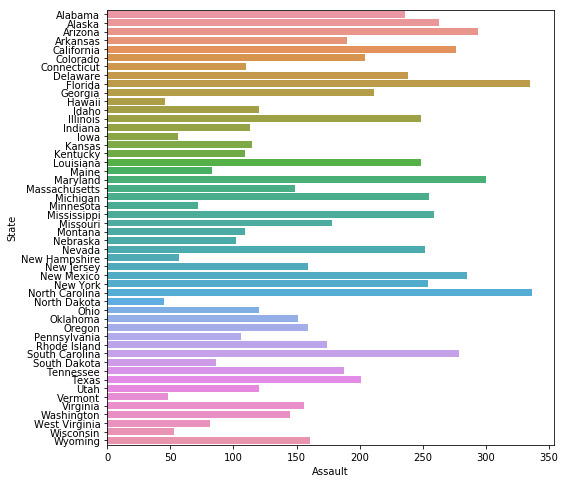

In [12]:
# Distribution of Assault rate based on State

plt.figure(figsize = (8, 8))
sns.barplot( usarrests_data['Assault'], usarrests_data['State'])
axes[0].set_title('Distribution of Assault rate based on State')

#### Insights:
- Highest Assault rate is in North Carolina. Followed by Florida and Maryland.
- Least Assault rate is in North Dakota

#### State vs Rape

Text(0.5, 1.0, 'Distribution of Rape rate based on State')

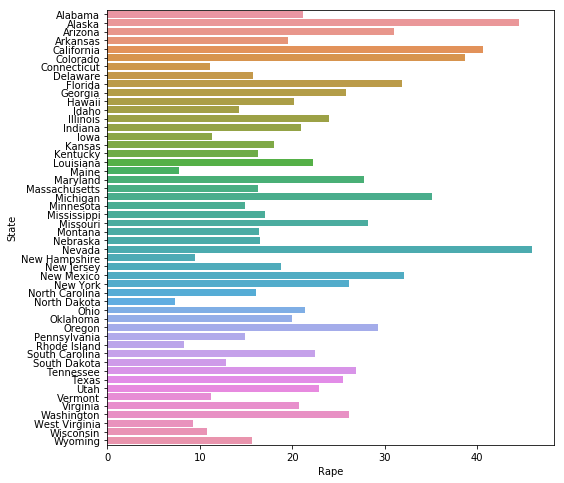

In [13]:
# Distribution of Rape rate based on State

plt.figure(figsize = (8, 8))
sns.barplot( usarrests_data['Rape'], usarrests_data['State'])
axes[0].set_title('Distribution of Rape rate based on State')

#### Insights:
- Highest Rape rate is in Nevada. Followed by Alaska and California.
- Least Rape rate is in North Dakota

#### Multivariate Analysis

In [14]:
# Group the murder, assault, rape rate by urban population
grouped_data = usarrests_data.groupby(['UrbanPop', 'State'], sort = True)
grouped_data.first()

Murder  Assault  Rape
UrbanPop State                                
32       Vermont            2.2       48  11.2
39       West Virginia      5.7       81   9.3
44       Mississippi       16.1      259  17.1
         North Dakota       0.8       45   7.3
45       North Carolina    13.0      337  16.1
         South Dakota       3.8       86  12.8
48       Alaska            10.0      263  44.5
         South Carolina    14.4      279  22.5
50       Arkansas           8.8      190  19.5
51       Maine              2.1       83   7.8
52       Kentucky           9.7      109  16.3
53       Montana            6.0      109  16.4
54       Idaho              2.6      120  14.2
56       New Hampshire      2.1       57   9.5
57       Iowa               2.2       56  11.3
58       Alabama           13.2      236  21.2
59       Tennessee         13.2      188  26.9
60       Georgia           17.4      211  25.8
         Wyoming            6.8      161  15.6
62       Nebraska           4.3      102  16.5
63       Virginia           8.5      156  20.7
65       Indiana            7.2      113  21.0
66       Kansas             6.0      115  18.0
         Louisiana         15.4      249  22.2
         Minnesota          2.7       72  14.9
         Wisconsin          2.6       53  10.8
67       Maryland          11.3      300  27.8
         Oregon             4.9      159  29.3
68       Oklahoma           6.6      151  20.0
70       Missouri           9.0      178  28.2
         New Mexico        11.4      285  32.1
72       Delaware           5.9      238  15.8
         Pennsylvania       6.3      106  14.9
73       Washington         4.0      145  26.2
74       Michigan          12.1      255  35.1
75       Ohio               7.3      120  21.4
77       Connecticut        3.3      110  11.1
78       Colorado           7.9      204  38.7
80       Arizona            8.1      294  31.0
         Florida           15.4      335  31.9
         Texas             12.7      201  25.5
         Utah               3.2      120  22.9
81       Nevada            12.2      252  46.0
83       Hawaii             5.3       46  20.2
         Illinois          10.4      249  24.0
85       Massachusetts      4.4      149  16.3
86       New York          11.1      254  26.1
87       Rhode Island       3.4      174   8.3
89       New Jersey         7.4      159  18.8
91       California         9.0      276  40.6

#### Insights:
- Assault and Rape rate is quite high in California(highest urban population).
- Though Georgia has 60% urban population, it has the highest murder rate.
- North Dakota has low murder, assault and rape rate.
- North Carolina with an urban population of 45% has high assault rate.
- Nevada has high urban population and has high rape and assault rate.

#### Correlation of Features

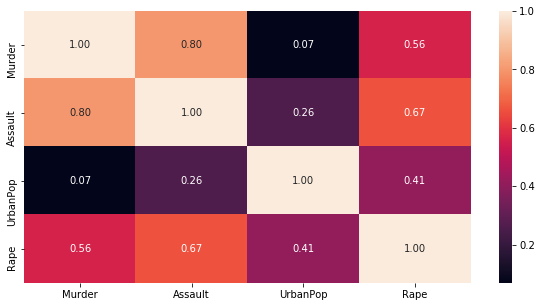

In [15]:
# Correlation of Features

plt.figure(figsize=(10, 5))
sns.heatmap(usarrests_data.corr(), annot=True, fmt = '0.2f')

#### Insights:
- UrbanPop and Murder are less correlated. 
- Assault, Murder and Rape rates are highly correlated

## Modelling

Unsupervised machine learning searches to find homogeneous clusters and find patterns, usually through dimensionality reduction, in unlabelled data. Some of the unsupervised machine learning include k-means clustering, hierarchical clustering, and principal component analysis (PCA). 

In [16]:
# Import libraries for modelling

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# To find K in KMeans clustering 
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

### Feature Scaling

We need to scale the variables before performing modelling, specially PCA, otherwise most of the principal components that we observed would be driven by the Assault variable, as it has the largest mean and variance.

In [17]:
# Set 'State' column as index

usarrests_data_for_scaling  = usarrests_data.set_index(['State'])

# Scaling the data

standard_scaler = StandardScaler()

usarrests_data_after_scaling = standard_scaler.fit_transform(usarrests_data_for_scaling)

# Convert the scaled data to a dataframe

usarrests_data_scaled = pd.DataFrame(usarrests_data_after_scaling, index = usarrests_data_for_scaling.index, 
                                     columns = usarrests_data_for_scaling.columns)
                                     
usarrests_data_scaled.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


### Principal Components Analysis

PCA finds a low-dimensional representation of a data set that contains as much as possible of the variation. PCA is a fundamentally a simple dimensionality reduction technique that transforms the columns of a dataset into a new set features called Principal Components (PCs). PCs are linear combination of the features. The PCs are formed in such a way that the first Principal Component (PC1) explains more variance in original data compared to PC2. Likewise, PC2 explains more than PC3, and so on. 
<BR>The Principal Component loading vector defines a direction in feature space along which the data vary the most. Large loadings (positive or negative) indicate that a particular variable has a strong relationship to a particular principal component. The sign of a loading indicates whether a variable and a principal component are positively or negatively correlated. If we project the data points onto this direction, the projected values are the principal component scores.
<BR><BR> We can perform PCA on the USArrests data set. In this data, the principal component score vectors have length of 50(number of observations), and the principal component loading vectors have length of 4(number of features). 

In [18]:
# PCA on the data

pca = PCA(svd_solver='randomized', random_state=42)

# Calculate the Principal Component Loading Vectors V1, V2, V3, V4
pc_loading_vectors = pd.DataFrame(pca.fit(usarrests_data_scaled).components_.T, columns  = ['V1', 'V2', 'V3', 'V4'], 
                             index = usarrests_data_scaled.columns)

pc_loading_vectors.head()

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [19]:
# Fit the PCA model and transform data to get the principal component scores

pc_scores = pd.DataFrame(pca.fit_transform(usarrests_data_scaled), columns  = ['PC1', 'PC2', 'PC3', 'PC4'], 
                      index = usarrests_data_scaled.index)
pc_scores.head(10)

,PC1,PC2,PC3,PC4
State,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285


explained_variance_ratio will provide the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [20]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.62006039 0.24744129 0.0891408  0.04335752]


The PC1 holds 62% of the information and the PC2 holds 24.7% of the information. While PC3 holds only 8.9% of the information and the PC4 holds only 4.3% of the information. PC1 and PC2 together explains about 87% of the variance. PC3 and PC4 has very little contribution to the variance of the original data.

#### Plot the principal component scores and the loading vectors

We can construct a biplot of the first two principal components using loading vectors and scores for the USArrests data. 

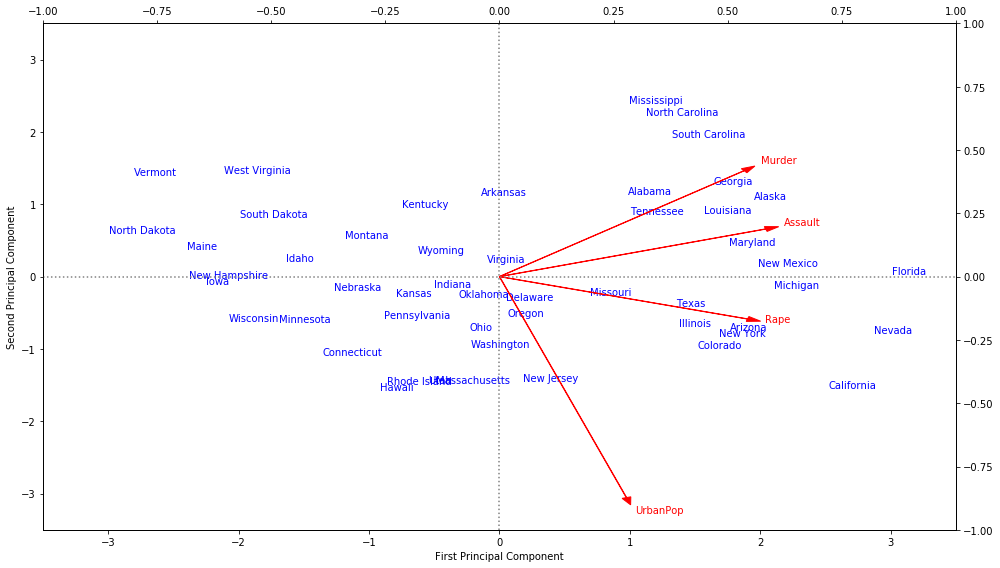

In [21]:
# Plot size
plt.figure(figsize=(14, 8))

# Plot the Principal Component Score
for i in pc_scores.index:
    plt.annotate(i, (pc_scores['PC1'][i], pc_scores['PC2'][i]), color='blue')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.ylim(-3.5,3.5)
plt.xlim(-3.5,3.5)

# Plot Principal Component loading vectors

# Create a twin Axes sharing the axis 
ax2 = plt.twinx().twiny();
ax2.set_ylim(-1,1);
ax2.set_xlim(-1,1);

# Reference lines
ax2.hlines(0,-1,1, linestyles='dotted', colors='grey')
ax2.vlines(0,-1,1, linestyles='dotted', colors='grey')

# small offset parameter to separate arrow tip and text
offset = 1.07

# Principal Component Loading Vectors
for a, i in enumerate(pc_loading_vectors.index):
    ax2.arrow(0, 0, pc_loading_vectors['V1'][a], pc_loading_vectors['V2'][a], facecolor='red', 
              edgecolor ='red', head_width=0.02)
    ax2.annotate(i, (pc_loading_vectors['V1'][a]*offset, pc_loading_vectors['V2'][a]*offset), color='red')
    
plt.tight_layout()

#### Insights:
- The blue state names represent the scores for the first two principal components. 
- The red arrows indicate the first two principal component loading vectors.
- The first loading vector(V1) places approximately equal weight on Assault, Murder, and Rape. UrbanPop has much less weight. Hence the first principal component corresponds to the measure of overall crime rates. 
- The second loading vector(V2) places most of its weight on UrbanPop and much less weight on the other three features. Hence, the second principal component corresponds to the urban population of the state.
- We can see that the crime-related variables (Murder, Assault, and Rape) are located close to each other. UrbanPop variable is far from the crime-related variables. 
- Also, this indicates that the crime-related variables are correlated with each other and that the UrbanPop variable is less correlated with the other three.
- States with high murder rates tend to have high assault and rape rates.
- States like Mississippi, North Carolina and South Carolina have similar crime rates.
- States with large positive scores on the first principal component, such as California, Nevada and Florida, have high crime rates
- While states like North Dakota, with negative scores on the first principal component, have low crime rates. 
- Georgia, Alaska, Louisana have high murder rate. Whereas Connecticut and Wiscosin have low murder rate.
- California has a high score on the second principal component, indicating a high urban population
- States close to zero on both components, such as Indiana, Oklahoma etc. have approximately average levels of both crime and urbanization.

### Clustering

Clustering is the task of grouping together a set of objects such that objects in the same cluster are more similar to each other than to objects in other clusters. 
The two types of clustering are as follows:
1. **Hard Clustering**: In this type, each data point either belongs to a cluster completely or not.
2. **Soft Clustering**: In this type, a data point can belong to more than one cluster with some probability or likelihood value.
    
Different types of clustering methods are:
1. **Connectivity-based clustering**: In  this clustering, data points which are closer have similar behavior as compared to data points that are farther. The clusters are formed by connecting data points according to their distance. At different distances, different clusters will form and can be represented using a dendrogram. It provides an extensive hierarchy of clusters that merge with each other at certain distances. Here the choice of distance function is subjective. These models are very easy to interpret but it lacks scalability . They are also not very robust towards outliers, which might show up as additional clusters or even cause other clusters to merge. They are also commonly called "hierarchical clustering".
2. **Centroid-based clustering**: In this iterative clustering algorithm, the clusters are formed by the closeness of data points to the centroid of clusters. This centroid might not necessarily be a member of the dataset. Centroid is formed such that the distance of data points is minimum with the center. K-means is a centroid based clustering.
3. **Distribution-based clustering**:This clustering is based on the notion of how probable is it for a data point to belong to a certain distribution. The grouping done may be Normal or Gaussian distribution. This model works good on synthetic data and diversely sized clusters. They often suffer from overfitting. Gaussian mixture models, using the expectation-maximization algorithm is a famous distribution based clustering method.
4. **Density-based clustering**:In this clustering model there will be a searching of data space for areas of varied density of data points in the data space . Clusters are defined as areas of higher density within the data space compared to other regions. Data points in the sparse areas are usually considered to be noise and/or border points. The drawback with these methods is that they expect some kind of density guide or parameters to detect cluster borders. DBSCAN and OPTICS are some prominent density based clustering.

### K-Means Clustering

The way K-Means algorithm works is as follows:<BR>
**Step 1**: Choose the number of clusters, K.<BR>
**Step 2**: Select K random points from the data as centroids<BR>
**Step 3**: Assign all the points to the closest cluster centroid
1. Compute the sum of the squared distance between data points and all centroids.
2. Assign each data point to the closest cluster (centroid).
    
**Step 4**: Recompute the centroids for the clusters by taking the average of the all data points that belong to each cluster.<BR>
**Step 5**: Re-assign all the points to the closest cluster taking the new cluster centroids.<BR>
**Step 6**: Iterate through steps 4 and 5 until there are no further changes possible.

The approach K-Means Clustering follows to solve the problem is called Expectation-Maximization. The E-step is assigning the data points to the closest cluster. The M-step is computing the centroid of each cluster. 

#### Find the optimal K for clustering

The aim of K-Means Clustering is to find the k clusters and their centers while reducing the total error. The two methods that can be useful to find this K in K-Means are:
1. Elbow Method
2. Silhouette Analysis Method

#### Elbow Method

In the elbow method, we calculate the Within-Cluster-Sum of Squared Errors (WCSS) for different values of K, and choose the K for where WCSS begins to diminish. 

In [22]:
# Calculate the Within-Cluster sum of squared distances

wcss = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50, random_state=42)
    model_clus.fit(usarrests_data_scaled)
    wcss.append(model_clus.inertia_)

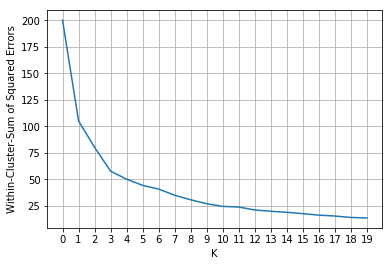

In [23]:
# Plot the  Within-Cluster-Sum of Squared Errors vs K plot

plt.plot(wcss)
plt.xticks(np.arange(0, 20, step=1))
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors')
plt.grid(True)

Here we could choose K to be either 3 or 5. In such an ambiguous case, we may use the Silhouette Method.

#### Silhouette Analysis

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [24]:
# To find the K, compute the silhouette score

silhouettescore = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=50).fit(usarrests_data_scaled)
    silhouettescore.append([k, silhouette_score(usarrests_data_scaled, kmeans.labels_)])

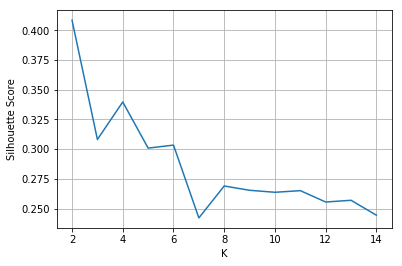

In [25]:
# Plot the  silhouette score vs K plot

plt.plot(pd.DataFrame(silhouettescore)[0], pd.DataFrame(silhouettescore)[1])
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid(True)

The Silhouette Score reaches its global maximum at the optimal K. Gobal maximum appear as a peak in the Silhouette Value-K plot. Hence, the **`optimal K is 4`**.

#### K-Means Clustering using optimal K = 4

In [26]:
# Cluster model with K = 4

kmeans_model = KMeans(n_clusters = 4, max_iter=50, random_state=42)

# Fit the model

kmeans_model.fit(usarrests_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [27]:
# Analysis of clusters formed

kmeans_clustered_data = usarrests_data_scaled.copy()
kmeans_clustered_data['ClusterID'] = kmeans_model.labels_
kmeans_clustered_data.head(10)

,Murder,Assault,UrbanPop,Rape,ClusterID
State,,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451,0
Alaska,0.513019,1.118060,-1.224067,2.509424,3
Arizona,0.072361,1.493817,1.009122,1.053466,3
Arkansas,0.234708,0.233212,-1.084492,-0.186794,0
California,0.281093,1.275635,1.776781,2.088814,3
Colorado,0.025976,0.402909,0.869548,1.883901,3
Connecticut,-1.040880,-0.736484,0.799761,-1.092723,1
Delaware,-0.437875,0.815030,0.450825,-0.585834,1
Florida,1.765415,1.990786,1.009122,1.150530,3


In [28]:
states_in_cluster0 = [state for state in kmeans_clustered_data.index if kmeans_clustered_data['ClusterID'][state]==0]
states_in_cluster1 = [state for state in kmeans_clustered_data.index if kmeans_clustered_data['ClusterID'][state]==1]
states_in_cluster2 = [state for state in kmeans_clustered_data.index if kmeans_clustered_data['ClusterID'][state]==2]
states_in_cluster3 = [state for state in kmeans_clustered_data.index if kmeans_clustered_data['ClusterID'][state]==3]

print('States in Cluster 0: ',states_in_cluster0)
print('States in Cluster 1: ',states_in_cluster1)
print('States in Cluster 2: ',states_in_cluster2)
print('States in Cluster 3: ',states_in_cluster3)

States in Cluster 0:  ['Alabama', 'Arkansas', 'Georgia', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee']
States in Cluster 1:  ['Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas', 'Massachusetts', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington', 'Wyoming']
States in Cluster 2:  ['Idaho', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']
States in Cluster 3:  ['Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Illinois', 'Maryland', 'Michigan', 'Missouri', 'Nevada', 'New Mexico', 'New York', 'Texas']


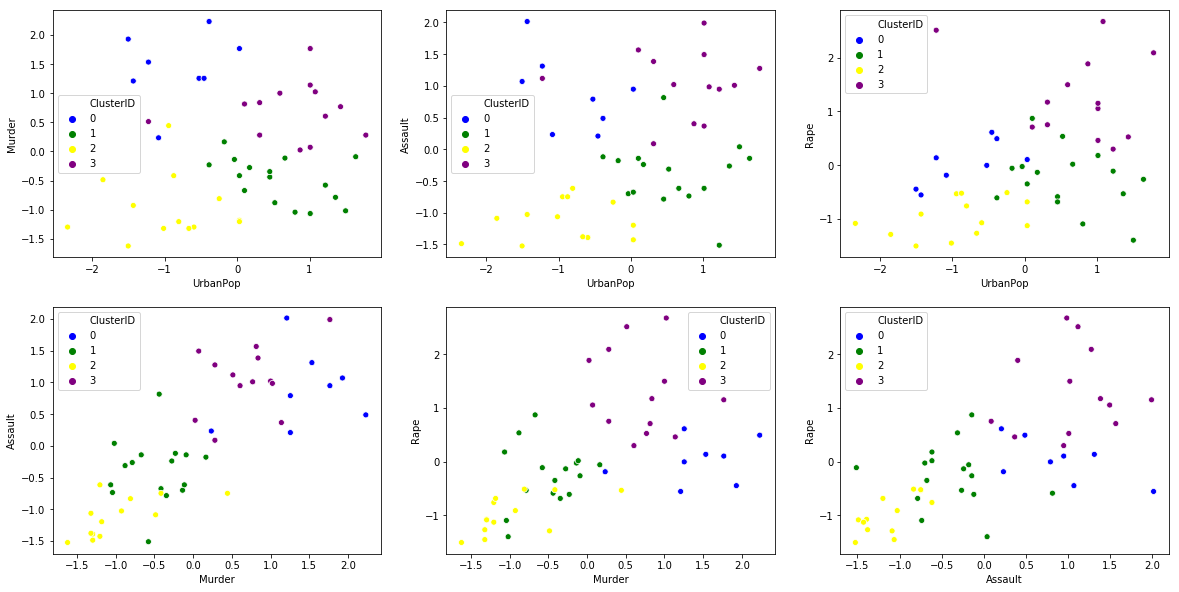

In [29]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
cmap = ['blue', 'green', 'yellow', 'purple']
sns.scatterplot(x=kmeans_clustered_data['UrbanPop'], y=kmeans_clustered_data['Murder'], hue=kmeans_clustered_data['ClusterID'], palette=cmap, ax=axes[0,0])
sns.scatterplot(x=kmeans_clustered_data['UrbanPop'], y=kmeans_clustered_data['Assault'], hue=kmeans_clustered_data['ClusterID'], palette=cmap, ax=axes[0,1])
sns.scatterplot(x=kmeans_clustered_data['UrbanPop'], y=kmeans_clustered_data['Rape'], hue=kmeans_clustered_data['ClusterID'], palette=cmap, ax=axes[0,2])
sns.scatterplot(x=kmeans_clustered_data['Murder'], y=kmeans_clustered_data['Assault'], hue=kmeans_clustered_data['ClusterID'], palette=cmap, ax=axes[1,0])
sns.scatterplot(x=kmeans_clustered_data['Murder'], y=kmeans_clustered_data['Rape'], hue=kmeans_clustered_data['ClusterID'], palette=cmap, ax=axes[1,1])
sns.scatterplot(x=kmeans_clustered_data['Assault'], y=kmeans_clustered_data['Rape'], hue=kmeans_clustered_data['ClusterID'], palette=cmap, ax=axes[1,2])

#### Insights:
- It can be seen that cluster group 3 have high urban population and high crime rates. 
- Whereas cluster group 2 have low urban population and low crime rates.
- Cluster 1 have high urban population and low crime rates.
- Cluster 0 have low urban population but high crime rates.
- Cluster 0 and Cluster 3 have high murder, assault and rape rates.
- Cluster 1 and Cluster 2 have low murder, assault and rape rates.

In the above analysis, we can see that the cluster groups formed are somewhat mingled, so for a better understanding we can do K-Means clustering on two principal components of the data.

#### K-Means Clustering with PCA

In [30]:
# Choose two principal components
kmeans_pca = PCA(svd_solver='randomized', random_state=42, n_components=2)

# Calculate the Principal Component Loading Vectors V1, V2, V3, V4
kmeans_pc_loading_vectors = pd.DataFrame(kmeans_pca.fit(usarrests_data_scaled).components_.T, columns  = ['V1', 'V2'], 
                             index = usarrests_data_scaled.columns)

# Fit the PCA model and transform  to get the principal component scores

kmeans_pc_scores = pd.DataFrame(kmeans_pca.fit_transform(usarrests_data_scaled), columns  = ['PC1', 'PC2'], 
                      index = usarrests_data_scaled.index)
kmeans_pc_scores.head(10)

,PC1,PC2
State,,
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934
Colorado,1.514563,-0.987555
Connecticut,-1.358647,-1.088928
Delaware,0.047709,-0.325359
Florida,3.013042,0.039229


In [31]:
# Cluster model with K = 4

kmeans_pca_model = KMeans(n_clusters = 4, max_iter=50,random_state=42)

# Fit the model

kmeans_pca_model.fit(kmeans_pc_scores)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [32]:
# Analysis of clusters formed

kmeans_pca_clustered_data = kmeans_pc_scores.copy()
kmeans_pca_clustered_data['ClusterID'] = kmeans_pca_model.labels_
kmeans_pca_clustered_data.head(10)

,PC1,PC2,ClusterID
State,,,
Alabama,0.985566,1.133392,2
Alaska,1.950138,1.073213,2
Arizona,1.763164,-0.745957,1
Arkansas,-0.141420,1.119797,2
California,2.523980,-1.542934,1
Colorado,1.514563,-0.987555,1
Connecticut,-1.358647,-1.088928,3
Delaware,0.047709,-0.325359,3
Florida,3.013042,0.039229,1


#### Plot the principal component scores, loading vectors along with cluster groupings

We can construct a biplot of the first two principal components using loading vectors and scores for the USArrests data. 

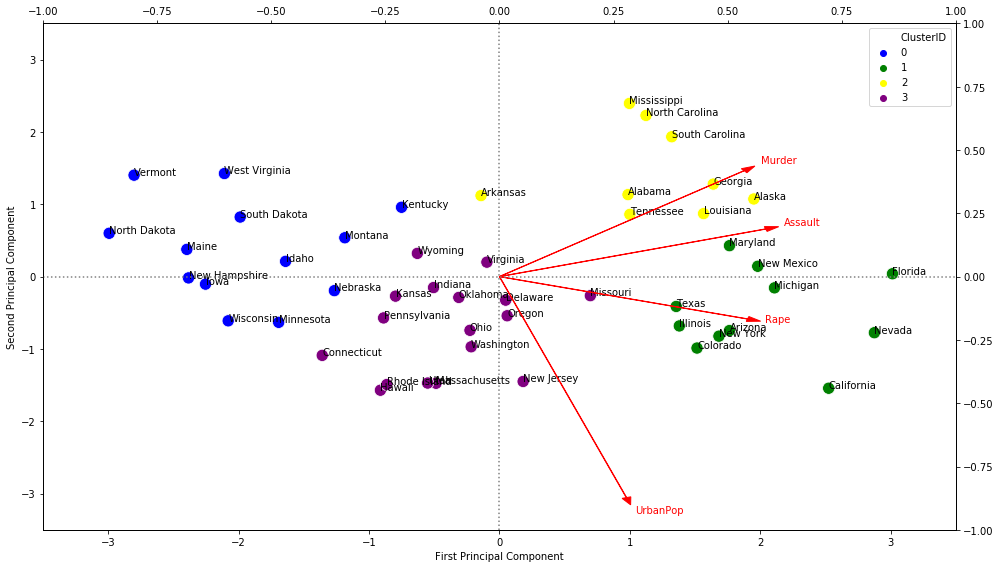

In [33]:
# Plot size
plt.figure(figsize=(14, 8))

# Plot the Principal Component Score
for i in kmeans_pca_clustered_data.index:
    plt.annotate(i, (kmeans_pca_clustered_data['PC1'][i], kmeans_pca_clustered_data['PC2'][i]), color='k')
sns.scatterplot(x=kmeans_pca_clustered_data['PC1'], y=kmeans_pca_clustered_data['PC2'],hue=kmeans_pca_clustered_data['ClusterID'],
                palette = ['blue', 'green', 'yellow', 'purple'], s = 150)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.ylim(-3.5,3.5)
plt.xlim(-3.5,3.5)

# Plot Principal Component loading vectors

# Create a twin Axes sharing the axis 
ax2 = plt.twinx().twiny();
ax2.set_ylim(-1,1);
ax2.set_xlim(-1,1);

# Reference lines
ax2.hlines(0,-1,1, linestyles='dotted', colors='grey')
ax2.vlines(0,-1,1, linestyles='dotted', colors='grey')

# small offset parameter to separate arrow tip and text
offset = 1.07

# Principal Component Loading Vectors
for a, i in enumerate(kmeans_pc_loading_vectors.index):
    ax2.arrow(0, 0, kmeans_pc_loading_vectors['V1'][a], kmeans_pc_loading_vectors['V2'][a], facecolor='red', 
              edgecolor ='red', head_width=0.02)
    ax2.annotate(i, (kmeans_pc_loading_vectors['V1'][a]*offset, kmeans_pc_loading_vectors['V2'][a]*offset), color='red')
    
plt.tight_layout()

#### Insights:

- In the cluster group with states, Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas,have high Assault and Rape rates along with high Urban Population.
- In the cluster group with states, Alabama, Alaska, Arkansas, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee have quite high Murder Rate.
- In the cluster group with states, Connecticut, Delaware, Hawaii, Indiana, Kansas, Massachusetts, Missouri, New Jersey, Oklahoma, Ohio, Oregon, Pennsylvania, Rhode Island, Utah, Virginia, Washington, Wyoming have average Murder, Assault and Rape rates along with average Urban Population.
- In the cluster group with states, Idaho, Iowa, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, South Dakota, Vermont, West Virginia, Wisconsin have less Muder, Assault and Rape rates along with less Urban Population.

### Heirarchical Clustering

Given a set of N items to be clustered, and an NXN distance (or similarity) matrix, the step in the hierarchical clustering are:<BR>
**Step 1**: Start by assigning each item to a cluster, so that N items have N clusters.<BR>
**Step 2**: Find the closest (most similar) pair of clusters and merge them into a single cluster, so that now one cluster is less.<BR>
**Step 3**: Compute distances (similarities) between the new cluster and each of the old clusters.<BR>
**Step 4**: Repeat steps 2 and 3 until all items are clustered into a single cluster of size N. <BR>

Distances can be computed in three different ways. they are:
1. **Single-linkage clustering**: In this, the distance between two clusters is defined as the shortest distance between points in the two clusters.
2. **Complete-linkage clustering**:In this, the distance between two clusters is defined as the maximum distance between points in the two clusters.
3. **Average-linkage clustering**:In this, the distance between two clusters is defined as the average distance between points in the two clusters.
4. **Ward-linkage clustering**: In this, the distance between two clusters is defined as the sum of squared differences within all clusters.

This kind of hierarchical clustering is called **`agglomerative`** because it merges clusters iteratively. There is also a **`divisive`** hierarchical clustering which does the reverse by starting with all objects in one cluster and subdividing them into smaller pieces. Divisive methods are not generally available, and rarely have been applied.

#### Plot the Dendograms for different linkages

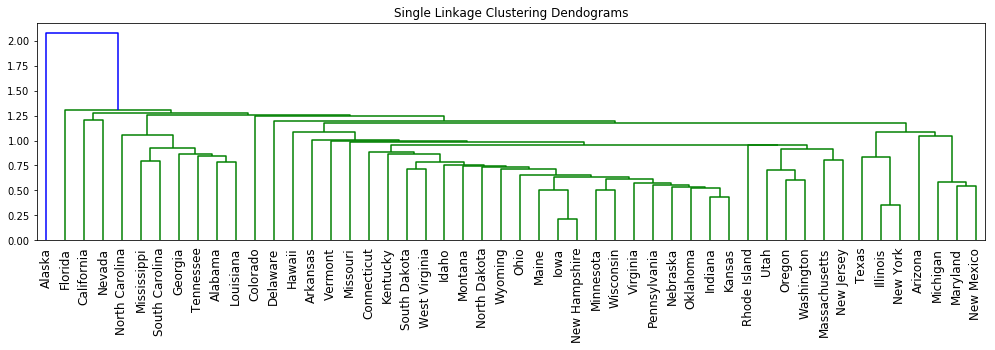

In [34]:
# Plot dendogram for Single Linkage Clustering
plt.figure(figsize=(17, 4))  
plt.title("Single Linkage Clustering Dendograms")  
dend = dendrogram(linkage(usarrests_data_scaled, method='single', metric = 'euclidean'), labels=usarrests_data_scaled.index)  
plt.xticks(fontsize=12)
plt.show()

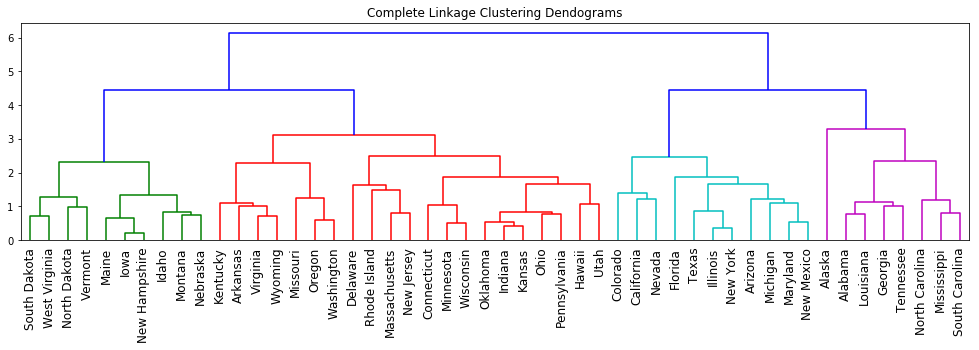

In [35]:
# Plot dendogram for Complete Linkage Clustering
plt.figure(figsize=(17, 4))  
plt.title("Complete Linkage Clustering Dendograms")  
dend = dendrogram(linkage(usarrests_data_scaled, method='complete', metric = 'euclidean'), labels=usarrests_data_scaled.index)  
plt.xticks(fontsize=12)
plt.show()

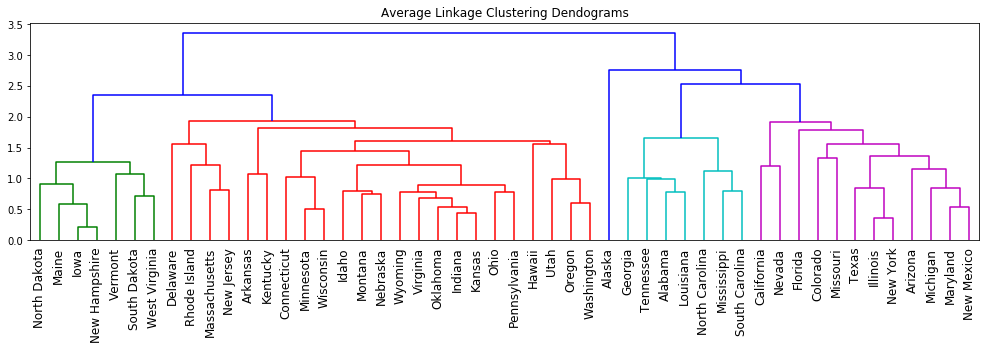

In [36]:
# Plot dendogram for Average Linkage Clustering
plt.figure(figsize=(17, 4))  
plt.title("Average Linkage Clustering Dendograms")  
dend = dendrogram(linkage(usarrests_data_scaled, method='average', metric = 'euclidean'), labels=usarrests_data_scaled.index)  
plt.xticks(fontsize=12)
plt.show()

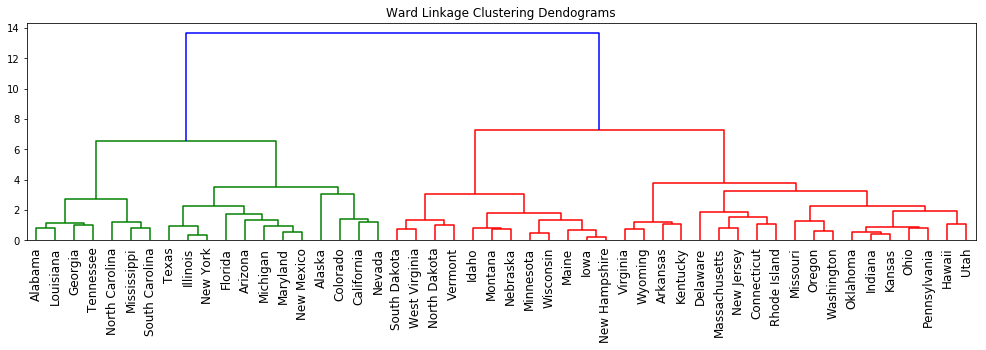

In [37]:
# Plot dendogram for Ward Linkage Clustering
plt.figure(figsize=(17, 4))  
plt.title("Ward Linkage Clustering Dendograms")  
dend = dendrogram(linkage(usarrests_data_scaled, method='ward', metric = 'euclidean'), labels=usarrests_data_scaled.index)  
plt.xticks(fontsize=12)
plt.show()

#### Insights:
- From the four dendograms, we can see that Single linkage clustering suffers from chaining effect. That is, clusters can be too spread out, and not compact enough. The similarity is usually not transitive(i.e. if A is similar to B, and B is similar to C, it doesn't mean that A must be similar to C).
- Complete linkage clustering avoids chaining but suffers from crowding effect. That is, Clusters are compact, but not far enough apart.
- In Average Linkage Clustering, also clusters are compact, but not far enough apart.
- In Ward  Linkage Clustering, clusters are compact, and far enough apart. Therefore, we will cluster using Ward linkage.

#### Ward-Linkage Agglomerative Clustering with 4 clusters

In [38]:
# Ward-Linkage Agglomerative Clustering 
hierarchical_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hierarchical_model.fit(usarrests_data_scaled)

# Analysis of clusters
hierarchical_clustered_data = usarrests_data_scaled.copy()
hierarchical_clustered_data['ClusterID'] = hierarchical_model.labels_
hierarchical_clustered_data.head(10)

,Murder,Assault,UrbanPop,Rape,ClusterID
State,,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451,3
Alaska,0.513019,1.118060,-1.224067,2.509424,1
Arizona,0.072361,1.493817,1.009122,1.053466,1
Arkansas,0.234708,0.233212,-1.084492,-0.186794,0
California,0.281093,1.275635,1.776781,2.088814,1
Colorado,0.025976,0.402909,0.869548,1.883901,1
Connecticut,-1.040880,-0.736484,0.799761,-1.092723,0
Delaware,-0.437875,0.815030,0.450825,-0.585834,0
Florida,1.765415,1.990786,1.009122,1.150530,1


In [39]:
states_in_cluster0 = [state for state in hierarchical_clustered_data.index if hierarchical_clustered_data['ClusterID'][state]==0]
states_in_cluster1 = [state for state in hierarchical_clustered_data.index if hierarchical_clustered_data['ClusterID'][state]==1]
states_in_cluster2 = [state for state in hierarchical_clustered_data.index if hierarchical_clustered_data['ClusterID'][state]==2]
states_in_cluster3 = [state for state in hierarchical_clustered_data.index if hierarchical_clustered_data['ClusterID'][state]==3]

print('States in Cluster 0: ',states_in_cluster0)
print('States in Cluster 1: ',states_in_cluster1)
print('States in Cluster 2: ',states_in_cluster2)
print('States in Cluster 3: ',states_in_cluster3)

States in Cluster 0:  ['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas', 'Kentucky', 'Massachusetts', 'Missouri', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington', 'Wyoming']
States in Cluster 1:  ['Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Illinois', 'Maryland', 'Michigan', 'Nevada', 'New Mexico', 'New York', 'Texas']
States in Cluster 2:  ['Idaho', 'Iowa', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']
States in Cluster 3:  ['Alabama', 'Georgia', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee']


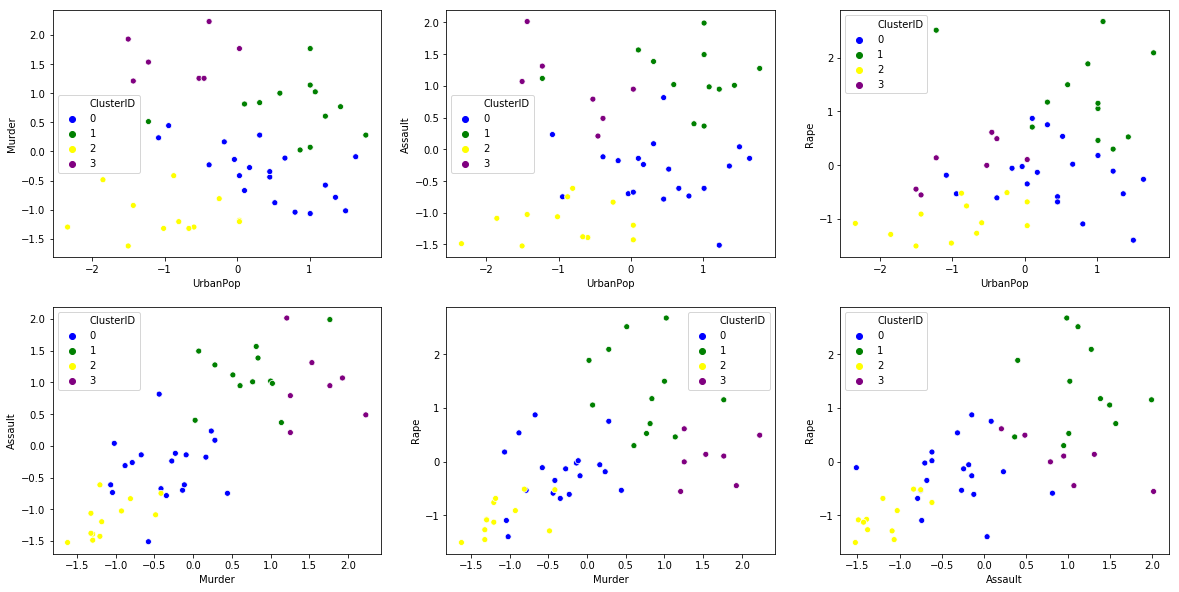

In [40]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
cmap = ['blue', 'green', 'yellow', 'purple']
sns.scatterplot(x=hierarchical_clustered_data['UrbanPop'], y=hierarchical_clustered_data['Murder'], hue=hierarchical_clustered_data['ClusterID'], palette=cmap, ax=axes[0,0])
sns.scatterplot(x=hierarchical_clustered_data['UrbanPop'], y=hierarchical_clustered_data['Assault'], hue=hierarchical_clustered_data['ClusterID'], palette=cmap, ax=axes[0,1])
sns.scatterplot(x=hierarchical_clustered_data['UrbanPop'], y=hierarchical_clustered_data['Rape'], hue=hierarchical_clustered_data['ClusterID'], palette=cmap, ax=axes[0,2])
sns.scatterplot(x=hierarchical_clustered_data['Murder'], y=hierarchical_clustered_data['Assault'], hue=hierarchical_clustered_data['ClusterID'], palette=cmap, ax=axes[1,0])
sns.scatterplot(x=hierarchical_clustered_data['Murder'], y=hierarchical_clustered_data['Rape'], hue=hierarchical_clustered_data['ClusterID'], palette=cmap, ax=axes[1,1])
sns.scatterplot(x=hierarchical_clustered_data['Assault'], y=hierarchical_clustered_data['Rape'], hue=hierarchical_clustered_data['ClusterID'], palette=cmap, ax=axes[1,2])

#### Insights:
- It can be seen that cluster group 1 have high urban population and high crime rates. 
- Whereas cluster group 2 have low urban population and low crime rates.
- Cluster 0 have high urban population and low crime rates.
- Cluster 3 have low urban population but high crime rates.
- Cluster 1 and Cluster 3 have high murder, assault and rape rates.
- Cluster 0 and Cluster 2 have low murder, assault and rape rates.

### Conclusion

In this analysis of US Arrests data using Unsupervised Learning using Principal Component Analysis, K-Means Clustering and Hierarchical Clustering, we can conclude that California, Nevada, Florida have high Urban Population and high Crime rates. Whereas states like North Dakota, South Dakota, Vermont have low Urban Population and low Crime rates.